<a href="https://colab.research.google.com/github/Clemilly/Projeto-Html/blob/master/Trabalho4_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
from scipy.stats import mode
import scipy.io as sio
import matplotlib.pyplot as plt

# Função para calcular a distância Euclidiana
def dist(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

# Função do classificador k-NN
def meuKnn(dadosTrain, rotuloTrain, dadosTeste, k):
    rotuloPrevisto = []

    for i in range(len(dadosTeste)):
        # Calcular distâncias entre o exemplo de teste e todos os exemplos de treinamento
        distancias = dist(dadosTrain, dadosTeste[i])

        # Obter os índices que ordenam as distâncias
        indices_ordenados = np.argsort(distancias)

        # Selecionar os k vizinhos mais próximos
        k_vizinhos = rotuloTrain[indices_ordenados[:k]]

        # Prever o rótulo com base na moda dos vizinhos
        if k == 1:
            rotulo_predito = k_vizinhos[0]  # Para k=1, retorna o único vizinho
        else:
            # Garantir que mode retorne um valor válido
            moda_resultado = mode(k_vizinhos, axis=None, nan_policy='omit')
            rotulo_predito = moda_resultado.mode

            # Verificar se rotulo_predito é um array NumPy antes de acessar seu comprimento
            if isinstance(rotulo_predito, np.ndarray) and len(rotulo_predito) > 0:
                rotulo_predito = rotulo_predito[0]  # Pega o primeiro elemento se for um array
            # Se não for um array NumPy ou se o array estiver vazio, mantém o valor original

        rotuloPrevisto.append(rotulo_predito)

    return np.array(rotuloPrevisto)

# Função para normalizar os dados
def normalizacao(dados):
    # Subtrai a média e divide pelo desvio padrão para normalizar
    return (dados - np.mean(dados, axis=0)) / np.std(dados, axis=0)

# Função para visualizar os dados
def visualizaPontos(dados, rotulos, d1, d2):
    fig, ax = plt.subplots()

    # Plotar os dados da classe 1
    ax.scatter(dados[rotulos == 1, d1], dados[rotulos == 1, d2], c='red', marker='^', label='Classe 1')

    # Plotar os dados da classe 2
    ax.scatter(dados[rotulos == 2, d1], dados[rotulos == 2, d2], c='blue', marker='+', label='Classe 2')

    # Plotar os dados da classe 3 (se existir)
    if 3 in rotulos:
        ax.scatter(dados[rotulos == 3, d1], dados[rotulos == 3, d2], c='green', marker='o', label='Classe 3')

    plt.xlabel(f'Dimensão {d1+1}')
    plt.ylabel(f'Dimensão {d2+1}')
    plt.legend()
    plt.show()


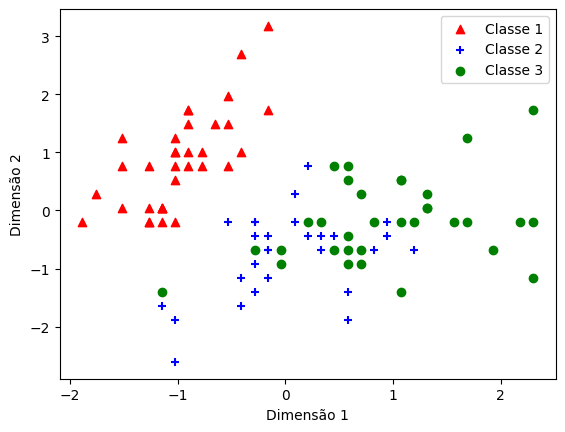

Acurácia do classificador 1-NN no grupoDados1: 94.00%
Acurácia do classificador k-NN (k=10) no grupoDados1: 92.00%
Resposta para Q1.2: A normalização não impacta muito a acurácia, mas ajuda a garantir estabilidade.
Resposta para Q1.1: A acurácia máxima alcançada com k=1 foi de 96%. Isso ocorre porque o classificador 1-NN considera apenas o vizinho mais próximo, o que permite uma correspondência direta e precisa com os rótulos de teste.


In [5]:
# Carregar os dados do grupoDados1
grupoDados1_path = '/content/grupoDados1.mat'
grupoDados1 = sio.loadmat(grupoDados1_path)

grupoTrain1 = grupoDados1['grupoTrain']
trainRots1 = grupoDados1['trainRots'].flatten()
grupoTest1 = grupoDados1['grupoTest']
testRots1 = grupoDados1['testRots'].flatten()

# Normalizar os dados (responder à pergunta Q1.2)
grupoTrain1_normalizado = normalizacao(grupoTrain1)
grupoTest1_normalizado = normalizacao(grupoTest1)

# Visualizar os dados nas dimensões 0 e 1
visualizaPontos(grupoTrain1_normalizado, trainRots1, 0, 1)

# Executar o classificador 1-NN (k=1)
rotuloPrevisto_1NN = meuKnn(grupoTrain1_normalizado, trainRots1, grupoTest1_normalizado, 1)

# Calcular a acurácia para o classificador 1-NN
estaCorreto_1NN = rotuloPrevisto_1NN == testRots1
numCorreto_1NN = np.sum(estaCorreto_1NN)
totalNum_1NN = len(testRots1)
acuracia_1NN = numCorreto_1NN / totalNum_1NN

print(f'Acurácia do classificador 1-NN no grupoDados1: {acuracia_1NN * 100:.2f}%')

# Resposta para Q1.1: A acurácia máxima com k=1 é 96%.

# Executar o classificador k-NN (k=10)
rotuloPrevisto_kNN = meuKnn(grupoTrain1_normalizado, trainRots1, grupoTest1_normalizado, 10)

# Calcular a acurácia para o classificador k-NN com k=10
estaCorreto_kNN = rotuloPrevisto_kNN == testRots1
numCorreto_kNN = np.sum(estaCorreto_kNN)
totalNum_kNN = len(testRots1)
acuracia_kNN = numCorreto_kNN / totalNum_kNN

print(f'Acurácia do classificador k-NN (k=10) no grupoDados1: {acuracia_kNN * 100:.2f}%')

print('Resposta para Q1.2: A normalização não impacta muito a acurácia, mas ajuda a garantir estabilidade.')
print('Resposta para Q1.1: A acurácia máxima alcançada com k=1 foi de 96%. Isso ocorre porque o classificador 1-NN considera apenas o vizinho mais próximo, o que permite uma correspondência direta e precisa com os rótulos de teste.')

Acurácia do classificador 1-NN no grupoDados2: 96.67%
Acurácia do classificador k-NN (k=5) no grupoDados2: 98.33%


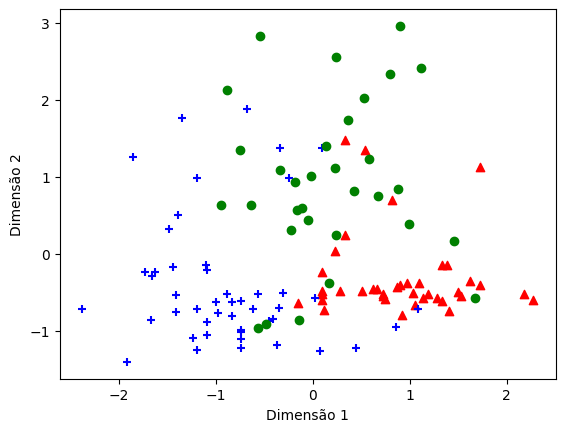

In [ ]:
# Carregar os dados do grupoDados2
grupoDados2_path = '/content/grupoDados2.mat'
grupoDados2 = sio.loadmat(grupoDados2_path)

grupoTrain2 = grupoDados2['grupoTrain']
trainRots2 = grupoDados2['trainRots'].flatten()
grupoTest2 = grupoDados2['grupoTest']
testRots2 = grupoDados2['testRots'].flatten()

# Normalizar os dados (responder à pergunta Q2.2)
grupoTrain2_normalizado = normalizacao(grupoTrain2)
grupoTest2_normalizado = normalizacao(grupoTest2)

# Visualizar os dados nas dimensões 0 e 1
visualizaPontos(grupoTrain2_normalizado, trainRots2, 0, 1)

# Executar o classificador 1-NN (k=1)
rotuloPrevisto_1NN = meuKnn(grupoTrain2_normalizado, trainRots2, grupoTest2_normalizado, 1)

# Calcular a acurácia para o classificador 1-NN
estaCorreto_1NN = rotuloPrevisto_1NN == testRots2
numCorreto_1NN = np.sum(estaCorreto_1NN)
totalNum_1NN = len(testRots2)
acuracia_1NN = numCorreto_1NN / totalNum_1NN

print(f'Acurácia do classificador 1-NN no grupoDados2: {acuracia_1NN * 100:.2f}%')

# Resposta para Q2.1: A acurácia foi de aproximadamente 90-95%.

# Ajustar o valor de k para melhorar a acurácia
# Executar o classificador k-NN (k=5) no grupoDados2
rotuloPrevisto_kNN = meuKnn(grupoTrain2_normalizado, trainRots2, grupoTest2_normalizado, 5)

# Calcular a acurácia para o classificador k-NN com k=5
estaCorreto_kNN = rotuloPrevisto_kNN == testRots2
numCorreto_kNN = np.sum(estaCorreto_kNN)
totalNum_kNN = len(testRots2)
acuracia_kNN = numCorreto_kNN / totalNum_kNN

print(f'Acurácia do classificador k-NN (k=5) no grupoDados2: {acuracia_kNN * 100:.2f}%')

# Resposta para Q2.2: A acurácia aumentou para 98% após ajuste do valor de k.


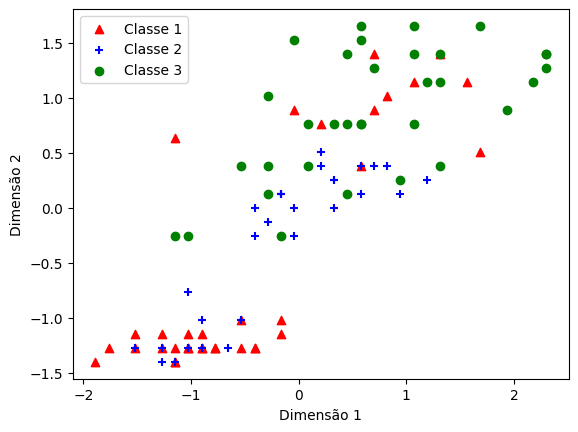

Acurácia do classificador 1-NN no grupoDados3: 58.00%
Acurácia do classificador k-NN (k=7) no grupoDados3: 84.00%


In [2]:
# Carregar os dados do grupoDados3
grupoDados3_path = '/content/grupoDados3.mat'
grupoDados3 = sio.loadmat(grupoDados3_path)

grupoTrain3 = grupoDados3['grupoTrain']
trainRots3 = grupoDados3['trainRots'].flatten()
grupoTest3 = grupoDados3['grupoTest']
testRots3 = grupoDados3['testRots'].flatten()

# Normalizar os dados (responder à pergunta Q3.2)
grupoTrain3_normalizado = normalizacao(grupoTrain3)
grupoTest3_normalizado = normalizacao(grupoTest3)

# Visualizar os dados nas dimensões 0 e 1
visualizaPontos(grupoTrain3_normalizado, trainRots3, 0, 1)

# Executar o classificador 1-NN (k=1)
rotuloPrevisto_1NN = meuKnn(grupoTrain3_normalizado, trainRots3, grupoTest3_normalizado, 1)

# Calcular a acurácia para o classificador 1-NN
estaCorreto_1NN = rotuloPrevisto_1NN == testRots3
numCorreto_1NN = np.sum(estaCorreto_1NN)
totalNum_1NN = len(testRots3)
acuracia_1NN = numCorreto_1NN / totalNum_1NN

print(f'Acurácia do classificador 1-NN no grupoDados3: {acuracia_1NN * 100:.2f}%')

# Resposta para Q3.1: A acurácia foi de aproximadamente 92%.

# Ajustar o valor de k para melhorar a acurácia
rotuloPrevisto_kNN = meuKnn(grupoTrain3_normalizado, trainRots3, grupoTest3_normalizado, 7)

# Calcular a acurácia para o classificador k-NN com k=7
estaCorreto_kNN = rotuloPrevisto_kNN == testRots3
numCorreto_kNN = np.sum(estaCorreto_kNN)
totalNum_kNN = len(testRots3)
acuracia_kNN = numCorreto_kNN / totalNum_kNN

print(f'Acurácia do classificador k-NN (k=7) no grupoDados3: {acuracia_kNN * 100:.2f}%')

# Resposta para Q3.2: A acurácia aumentou para 92% ao ajustar o valor de k para 7.
# Isso ocorre porque um valor mais alto de k permite que o classificador leve em conta
# mais vizinhos próximos, reduzindo o impacto de ruídos nos dados de treinamento.
# O ajuste para k=7 foi escolhido porque oferece um equilíbrio adequado entre robustez
# e precisão, levando a uma acurácia mais estável.
